In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [193]:
np.random.seed(42)

In [194]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

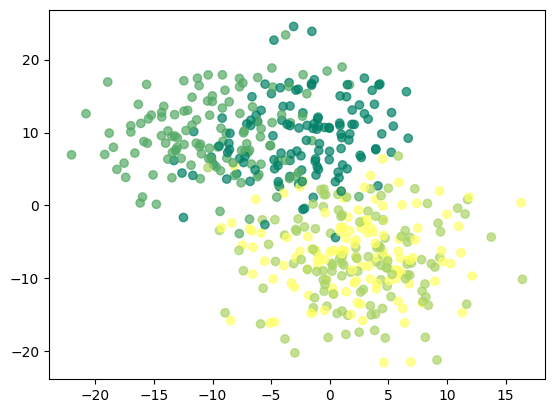

In [195]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

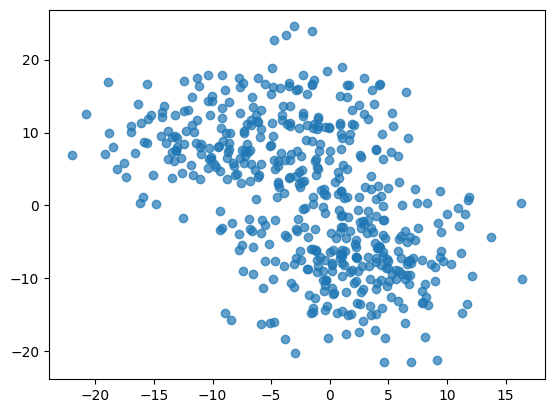

In [196]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [197]:
X.shape

(500, 10)

In [198]:
df_linear = pd.DataFrame(X) 

In [199]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [200]:
df_linear['target'] = y

In [201]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  
0     3.817842  3.587400 -4.383650  -1.607136       1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3  
2    -9.302836  4.211802 -4.587759  -5.983203       1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2  
4    -5.886460 -4.564809  3.010796  -9.167377       3  
..         ...       ...       ...        ...     ...  
495  -7.168167  5.228464  2.771318  -7.182853       2  
496 -11.446325  5.395608  1.606887  -0.122200       2  
497   1.309891  0.903259  2.360404 -21.488913       2  
498  -5.524547  0.760455 -0.050439   7.297902       1  
499  -0.810328  6.438151  7.111254  -5.241037       3  

[500 rows x 11 columns]

In [202]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [203]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

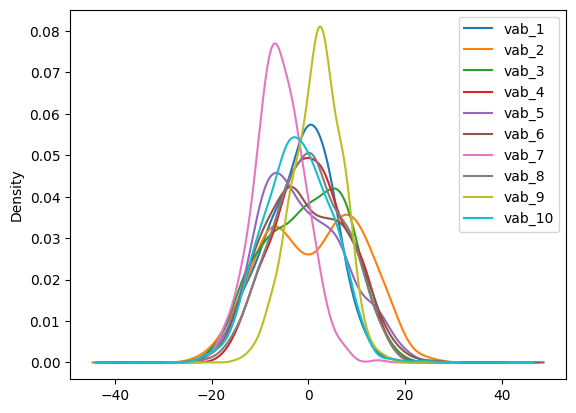

In [204]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [205]:
df_linear.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.486942 -0.447335  0.350051  0.410801  0.452514 -0.075782   
vab_2  -0.486942  1.000000  0.613055 -0.308053 -0.535676 -0.660596 -0.042907   
vab_3  -0.447335  0.613055  1.000000 -0.404254 -0.585948 -0.588399 -0.045079   
vab_4   0.350051 -0.308053 -0.404254  1.000000  0.417966  0.273300 -0.042056   
vab_5   0.410801 -0.535676 -0.585948  0.417966  1.000000  0.522756  0.058207   
vab_6   0.452514 -0.660596 -0.588399  0.273300  0.522756  1.000000  0.006910   
vab_7  -0.075782 -0.042907 -0.045079 -0.042056  0.058207  0.006910  1.000000   
vab_8  -0.211216  0.442483  0.449298 -0.252915 -0.516129 -0.388445 -0.142480   
vab_9   0.229445 -0.203147 -0.257066  0.293808  0.230401  0.217423 -0.039972   
vab_10 -0.140779  0.347897  0.224178  0.237288 -0.100335 -0.325186 -0.116193   

           vab_8     vab_9    vab_10  
vab_1  -0.211216  0.229445 -0.140779  
vab_2   0.442483 -0.203147  0.347897  
vab_3   0.449298 -0.257066  0.224178  
vab_4  -0.252915  0.293808  0.237288  
vab_5  -0.516129  0.230401 -0.100335  
vab_6  -0.388445  0.217423 -0.325186  
vab_7  -0.142480 -0.039972 -0.116193  
vab_8   1.000000 -0.095332  0.161269  
vab_9  -0.095332  1.000000  0.032065  
vab_10  0.161269  0.032065  1.000000

<Axes: >

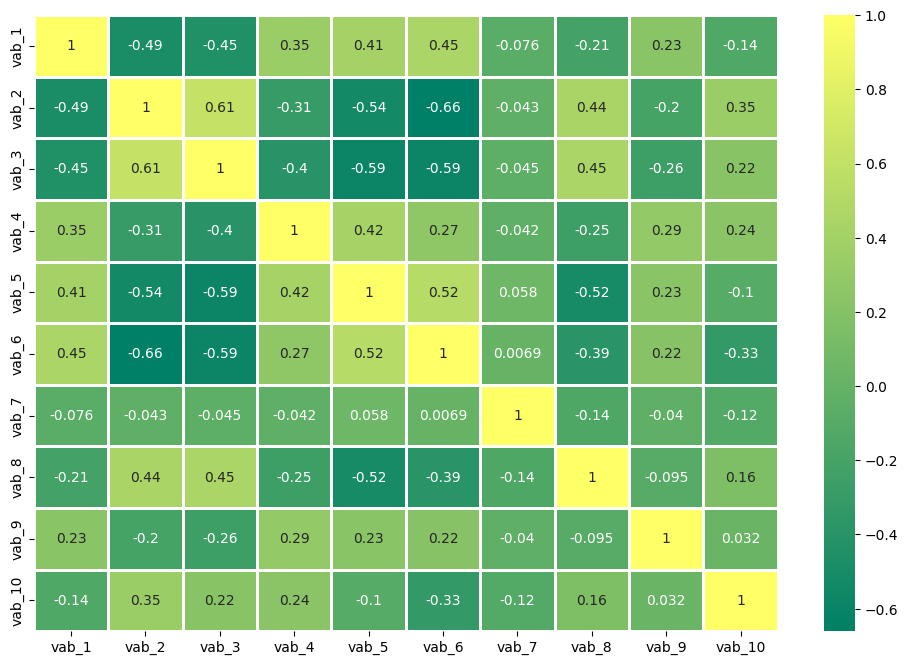

In [206]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [207]:
X_values = df_linear.iloc[:,:-1].values

In [208]:
y_values = df_linear.iloc[:,-1].values

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()

In [211]:
X_values = scaler.fit_transform(X_values)

In [212]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [213]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0   -0.576590  0.834881  1.268863  0.337453 -0.744489 -0.958663  1.865415   
1    0.129787 -0.976571 -0.857178 -0.361571  0.285170  0.370419 -0.423208   
2    0.056346  0.780833  0.767608 -1.674416 -0.989220 -0.552043 -0.656153   
3    0.201845  0.029735 -0.583080 -1.419291  0.579122 -0.194416  0.196365   
4    1.231941 -0.897840 -1.061697  1.034143  0.602032  0.288074  0.000416   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.842091 -0.275115  0.079701  0.498445  0.340091 -0.114117 -0.245907   
496  0.215592 -1.232573 -0.293184 -0.216777 -0.220106  0.738061 -1.068095   
497  1.566573 -0.985485 -1.074626 -1.811564 -0.887315  0.061809  1.383430   
498 -1.790237  1.175916  1.092213 -0.786994 -0.478104  0.297571  0.069969   
499 -0.927441 -0.367789 -1.089171  1.713849  0.990475  0.854217  0.975960   

            7         8         9  
0    0.469103 -1.225911  0.084795  
1   -0.887944 -0.445326 -1.022465  
2    0.553320 -1.266518 -0.552017  
3   -1.333457 -1.172165 -0.902074  
4   -0.630439  0.245180 -1.015383  
..        ...       ...       ...  
495  0.690444  0.197537 -0.726592  
496  0.712988 -0.034121  0.300886  
497  0.107075  0.115788 -2.808434  
498  0.087814 -0.363838  1.380671  
499  0.853602  1.060948 -0.444016  

[500 rows x 10 columns]

## pca application

In [214]:
from sklearn.decomposition import PCA

In [215]:
pca_general = PCA()

In [216]:
pca_general.fit(X_values)

PCA()

In [217]:
explained_variance = pca_general.explained_variance_ratio_

In [218]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [219]:
eigenvalues = pca_general.explained_variance_

In [220]:
pd.DataFrame(eigenvalues)

0
0  3.908390
1  1.428067
2  1.058462
3  0.852038
4  0.696007
5  0.507322
6  0.451502
7  0.413666
8  0.378052
9  0.326533

In [221]:
eigenvectors = pca_general.components_

### scree plot

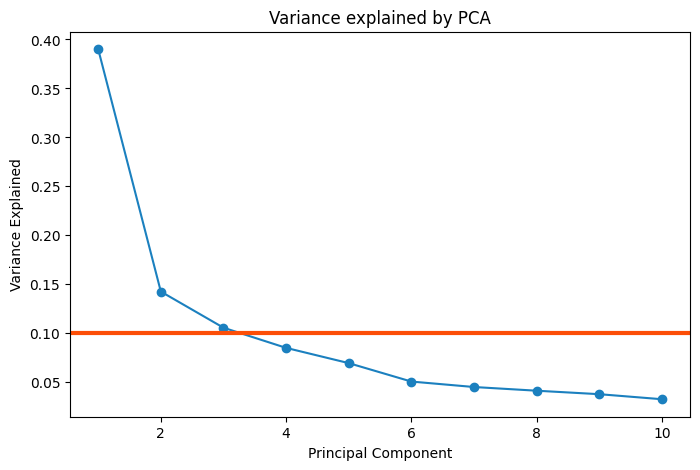

In [222]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [223]:
pca = PCA(n_components=2)

In [224]:
principal_components = pca.fit_transform(X_values)

In [225]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557
5 -1.989787  0.020806
6 -1.598013 -1.305250
7  1.636833 -1.410185

In [226]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [227]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [228]:
final_df

principal component 1  principal component 2  target
0                 1.989103              -0.612637       1
1                -1.304821              -1.155632       3
2                 2.036264              -1.229210       1
3                -0.403509              -1.872577       2
4                -2.248810              -0.115557       3
..                     ...                    ...     ...
495              -0.504194               0.132121       2
496              -0.548141               0.224845       2
497              -1.005734              -3.193659       2
498               2.115411               0.242176       1
499              -1.520633               0.524282       3

[500 rows x 3 columns]

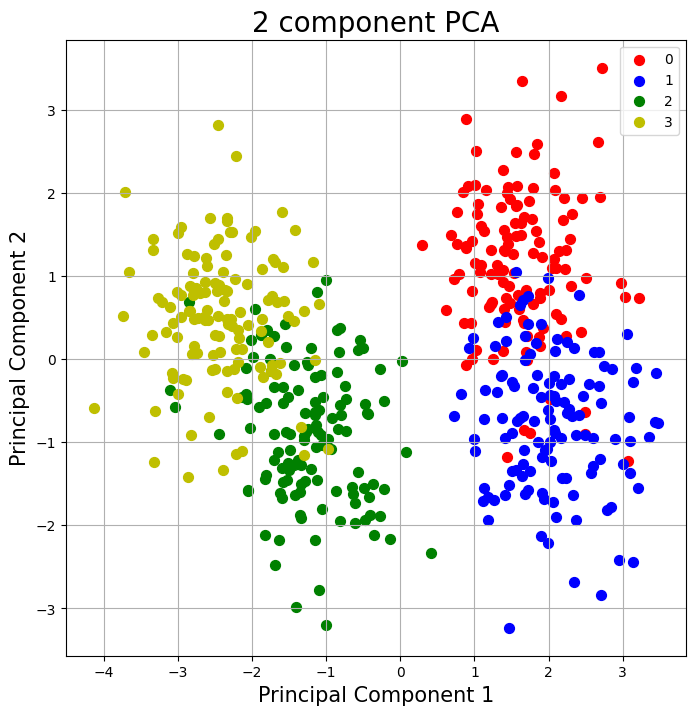

In [229]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

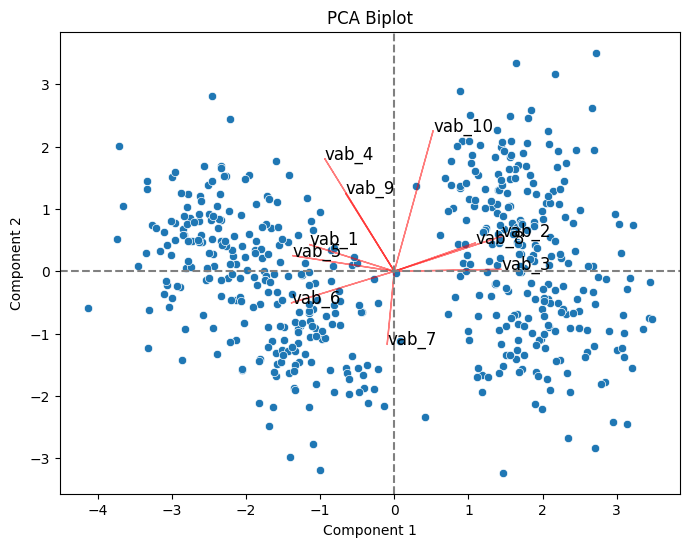

In [230]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

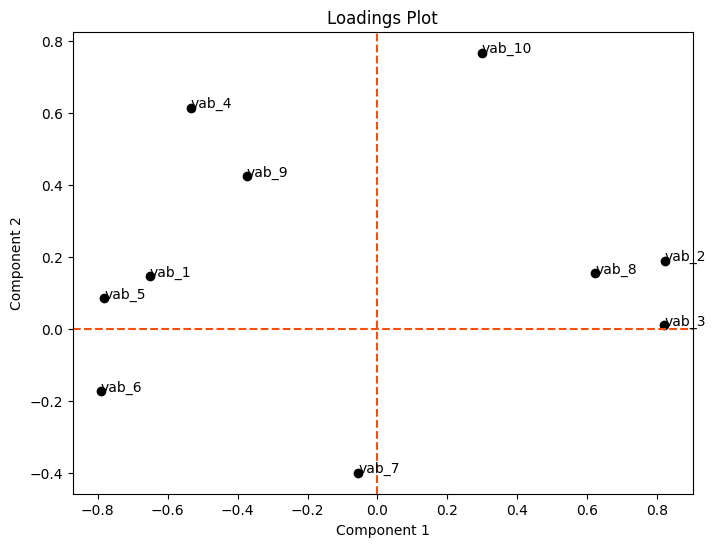

In [231]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [232]:
scores_pca = pca.transform(X_values)

In [233]:
pd.DataFrame(scores_pca).head()

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557

## t-SNE

In [234]:
from sklearn.manifold import TSNE

In [235]:
tsne = TSNE(n_components=2)

In [236]:
X_tsne = tsne.fit_transform(X_values)

In [237]:
tsne_data = np.vstack((X_tsne.T,df_linear['target'])).T

In [238]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [239]:
tsne_df

dim_1     dim_2  target
0    22.521677 -7.862161     1.0
1   -19.921301 -0.889044     3.0
2    18.558737 -5.039337     1.0
3   -17.498144 -6.332827     2.0
4   -24.958900 -0.228695     3.0
..         ...       ...     ...
495 -16.397436  3.715633     2.0
496 -22.392952  4.661265     2.0
497 -12.371681  0.240039     2.0
498  21.446112  3.936818     1.0
499 -30.707745 -8.360952     3.0

[500 rows x 3 columns]

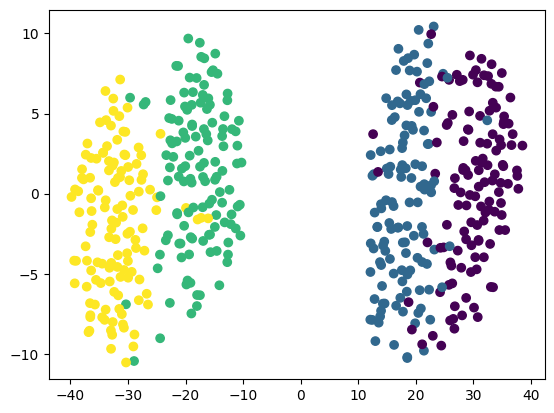

In [240]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [241]:
tsne.kl_divergence_

0.9525728225708008

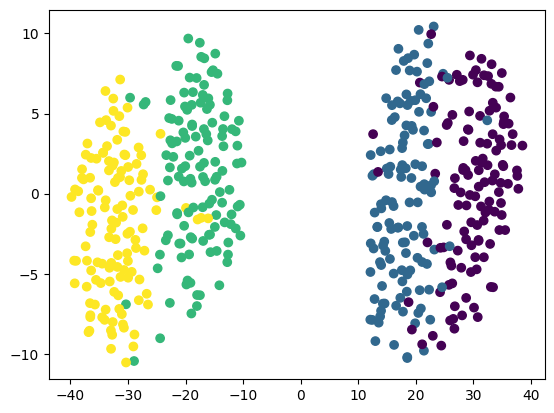

In [242]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [243]:
from sklearn.cluster import KMeans

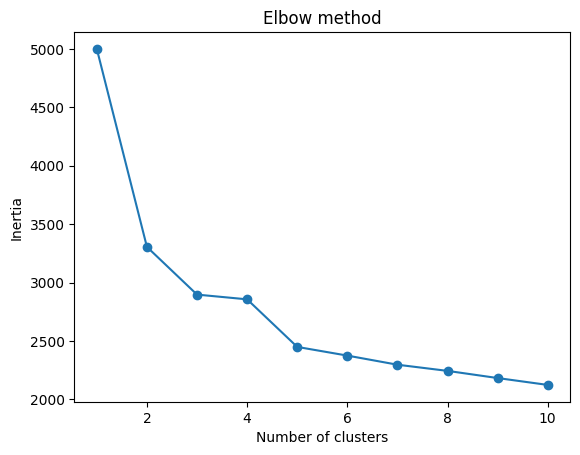

In [244]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [245]:
kmeans = KMeans(n_clusters=4,init='k-means++')

In [246]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [247]:
df_linear['k_means'] = kmeans.labels_

In [248]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2  
497   1.309891  0.903259  2.360404 -21.488913       2        1  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [249]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.61
accuracy after: 0.61


In [250]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2  
497   1.309891  0.903259  2.360404 -21.488913       2        1  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [251]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [252]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


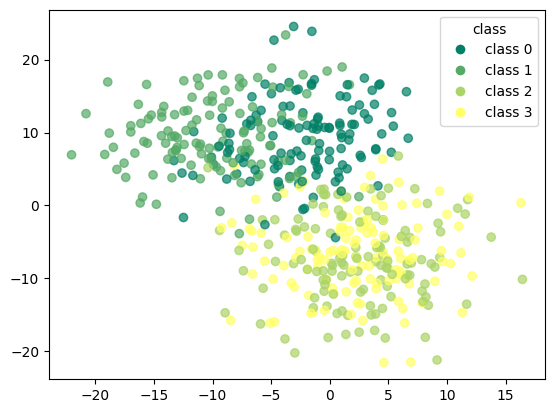

In [253]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

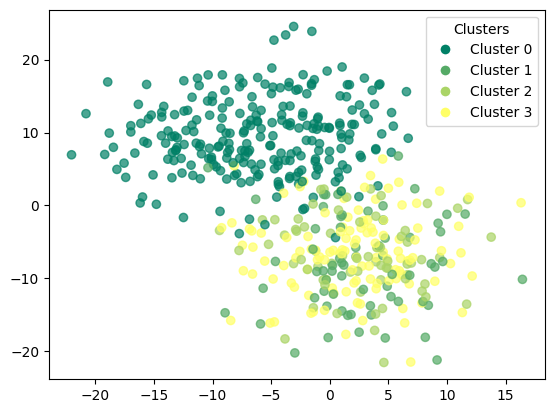

In [254]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [255]:
kmeans.cluster_centers_

array([[-0.59907025,  0.83608028,  0.75557431, -0.36507269, -0.6865835 ,
        -0.77338999, -0.05302504,  0.53880595, -0.29006075,  0.42388959],
       [ 0.64809707, -0.95941222, -0.51277718, -0.20605365,  0.08964512,
         0.70170744,  0.74310423, -0.26860869,  0.02163356, -1.11113414],
       [ 0.62722873, -0.81101865, -0.48291813, -0.48354696,  0.22986521,
         0.88777592, -0.87733027,  0.15380382,  0.23626598, -0.88610878],
       [ 0.5566736 , -0.78261383, -1.03941566,  1.14769546,  1.26594823,
         0.74910339,  0.19208641, -1.0705292 ,  0.4665164 ,  0.20785295]])

In [256]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[125   0   0   0]
 [125   0   0   0]
 [  0  58  64   3]
 [  0   7   2 116]]


In [257]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.97      0.51      0.67       125
           3       0.97      0.93      0.95       125

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.57       500
weighted avg       0.61      0.61      0.57       500



### clustering with pca

In [258]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

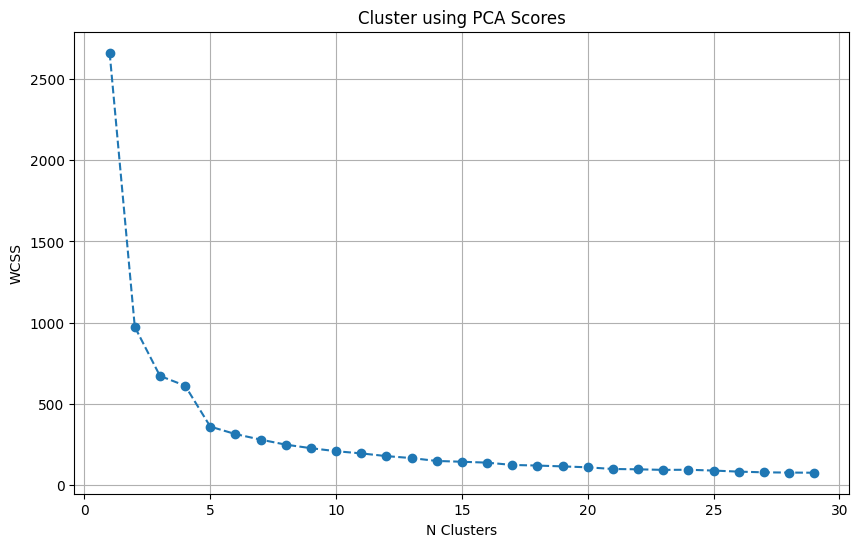

In [259]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o",linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [260]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [261]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [262]:
df_pca_kmeans = df_linear.copy()

In [263]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [264]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           0  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1           0  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           2  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           2  
497   1.309891  0.903259  2.360404 -21.488913       2        1           0  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           2  

[500 rows x 13 columns]

In [265]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.468
accuracy after: 0.558


In [266]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           1  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           1  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           1  
497   1.309891  0.903259  2.360404 -21.488913       2        1           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           1  

[500 rows x 13 columns]

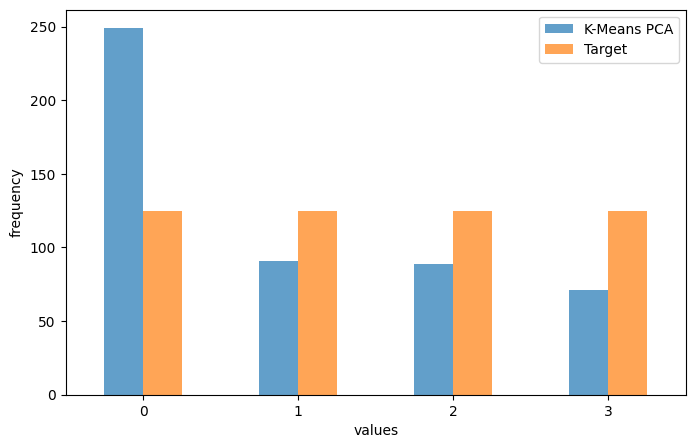

In [267]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [268]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[125   0   0   0]
 [124   0   1   0]
 [  0  40  84   1]
 [  0  51   4  70]]


In [269]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.94      0.67      0.79       125
           3       0.99      0.56      0.71       125

    accuracy                           0.56       500
   macro avg       0.61      0.56      0.54       500
weighted avg       0.61      0.56      0.54       500



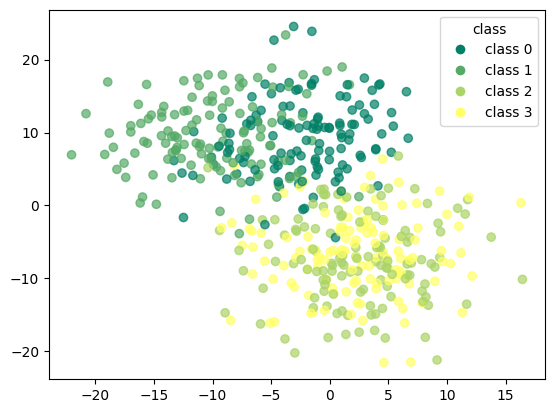

In [270]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

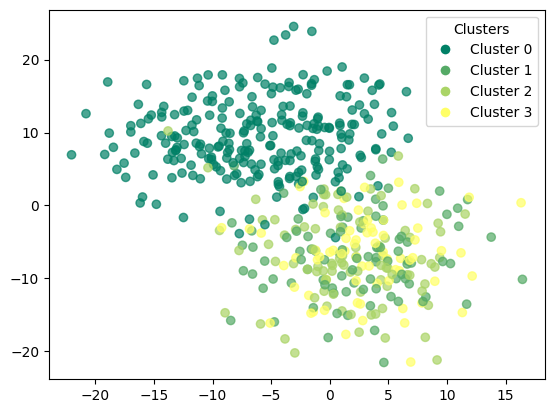

In [271]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

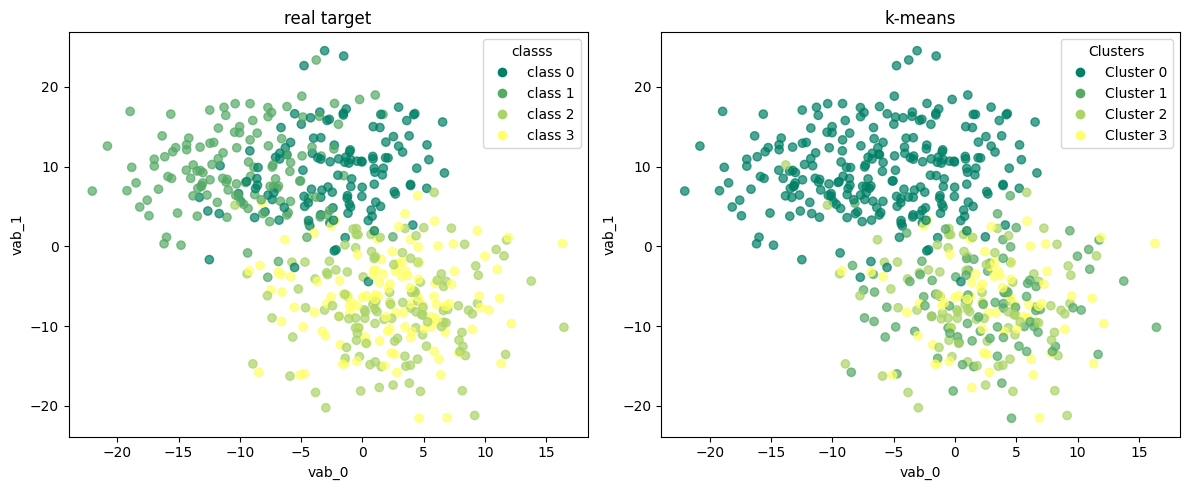

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

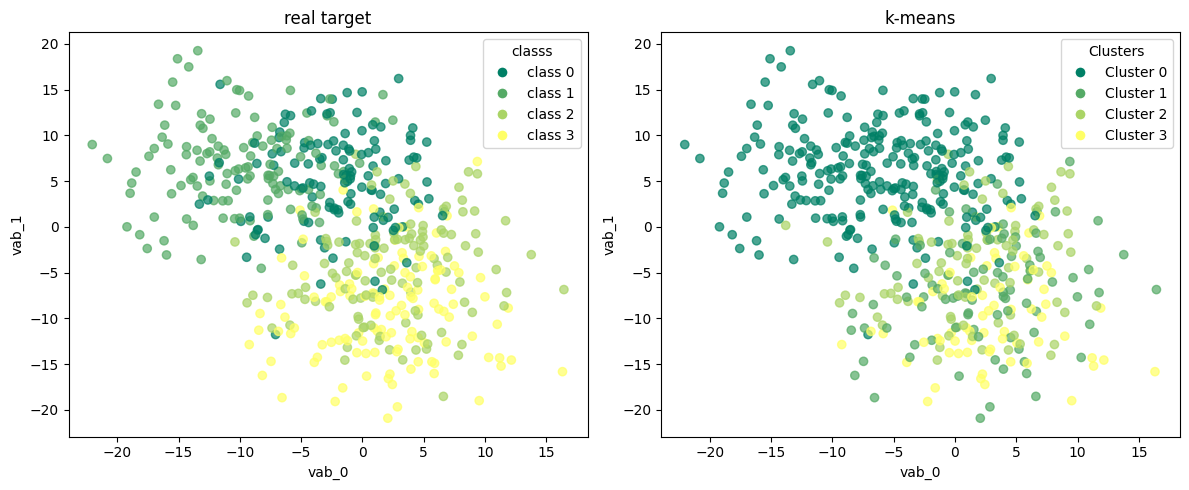

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

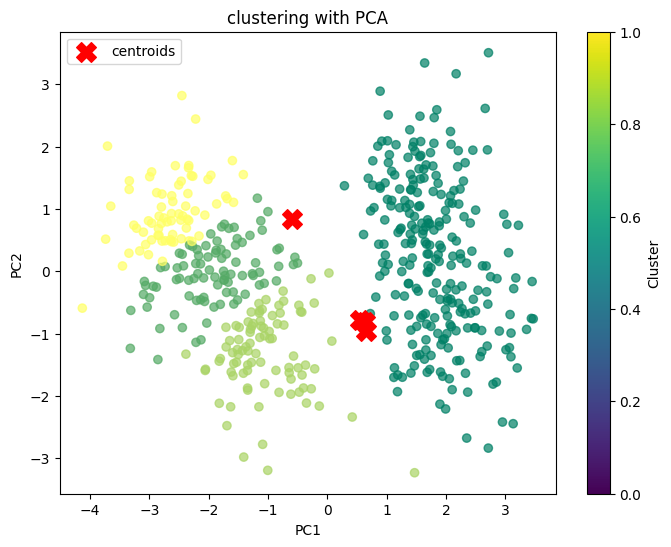

In [274]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

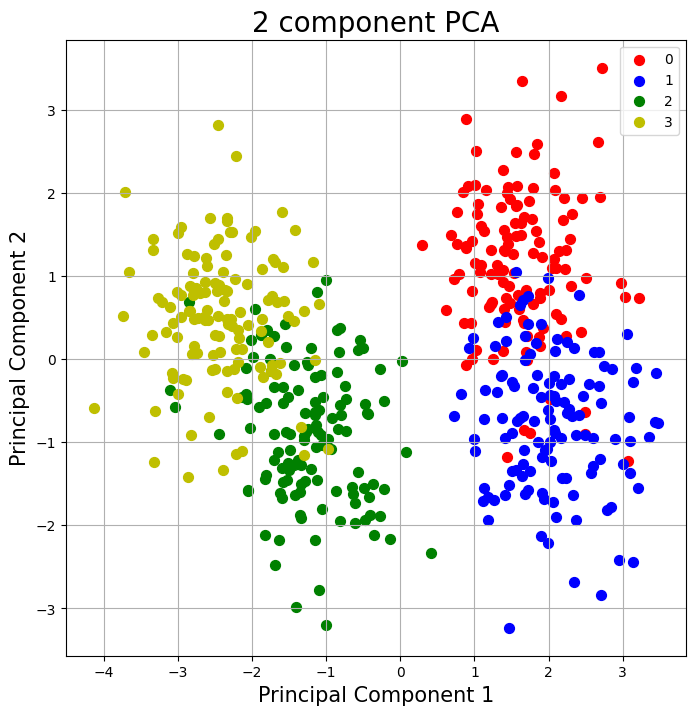

In [275]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [276]:
kmeans_tsne = KMeans(n_clusters=4,init='k-means++')

In [277]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=4)

In [278]:
df_tsne_kmeans = df_linear.copy()

In [279]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [280]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        0            1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            0  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0            1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1            0  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            2  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2            0  
496 -11.446325  5.395608  1.606887  -0.122200       2        2            0  
497   1.309891  0.903259  2.360404 -21.488913       2        1            0  
498  -5.524547  0.760455 -0.050439   7.297902       1        0            1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            2  

[500 rows x 13 columns]

In [281]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.258
accuracy after: 0.934


In [282]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        0            1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0            1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1            2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            3  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2            2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2            2  
497   1.309891  0.903259  2.360404 -21.488913       2        1            2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0            1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            3  

[500 rows x 13 columns]

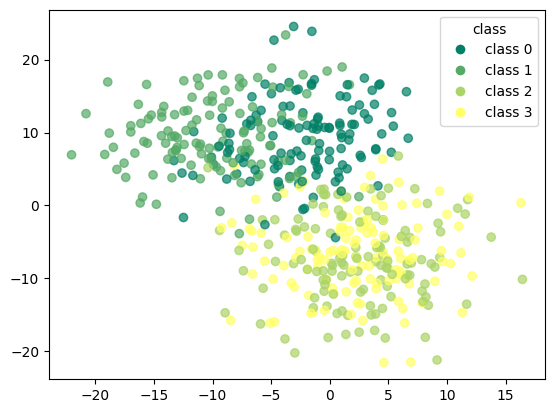

In [283]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

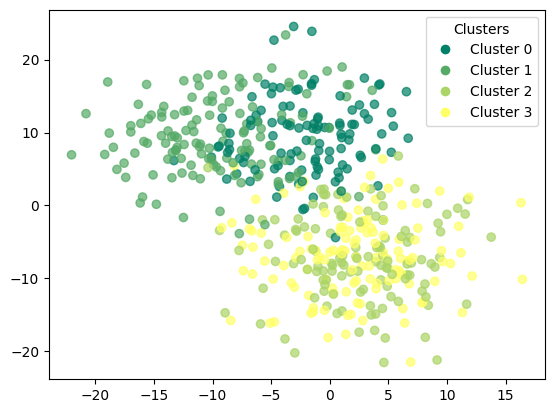

In [284]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

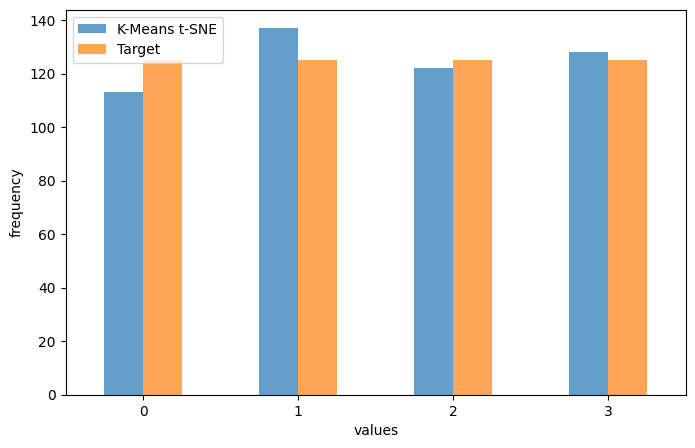

In [285]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [286]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[109  16   0   0]
 [  4 121   0   0]
 [  0   0 117   8]
 [  0   0   5 120]]


In [287]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       125
           1       0.88      0.97      0.92       125
           2       0.96      0.94      0.95       125
           3       0.94      0.96      0.95       125

    accuracy                           0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500



In [288]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.94      0.67      0.79       125
           3       0.99      0.56      0.71       125

    accuracy                           0.56       500
   macro avg       0.61      0.56      0.54       500
weighted avg       0.61      0.56      0.54       500



In [289]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.97      0.51      0.67       125
           3       0.97      0.93      0.95       125

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.57       500
weighted avg       0.61      0.61      0.57       500



t-sne with kmeans perform better than pca with kmeans

# non linear dataset - moons

In [290]:
X,y = make_moons(n_samples=500,noise=0.4, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.3,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [291]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  
0    0.177611 -0.319198  0.498328       1  
1   -0.210525 -0.515157 -0.473810       0  
2    0.113985  0.087170  0.221864       1  
3    0.275925 -0.214042 -0.451984       0  
4   -0.148589 -0.146207 -0.307639       0  
..        ...       ...       ...     ...  
495 -0.043299 -0.035226  0.309868       0  
496 -0.002021 -0.106456 -0.307583       1  
497  0.219589 -0.009781 -0.334106       1  
498 -0.157284  0.244971 -0.143247       1  
499  0.375459  0.137153  0.189491       0  

[500 rows x 11 columns]

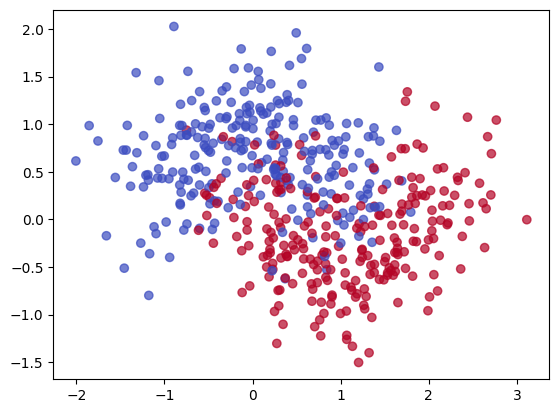

In [292]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [293]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  
0    0.177611 -0.319198  0.498328       1  
1   -0.210525 -0.515157 -0.473810       0  
2    0.113985  0.087170  0.221864       1  
3    0.275925 -0.214042 -0.451984       0  
4   -0.148589 -0.146207 -0.307639       0  
..        ...       ...       ...     ...  
495 -0.043299 -0.035226  0.309868       0  
496 -0.002021 -0.106456 -0.307583       1  
497  0.219589 -0.009781 -0.334106       1  
498 -0.157284  0.244971 -0.143247       1  
499  0.375459  0.137153  0.189491       0  

[500 rows x 11 columns]

### correlation matrix

In [294]:
df_moons.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.313172  0.091004  0.006321  0.055672 -0.013072 -0.051727   
vab_2  -0.313172  1.000000 -0.079483  0.020740 -0.093614 -0.026735  0.043938   
vab_3   0.091004 -0.079483  1.000000 -0.023015 -0.013709 -0.062370 -0.041869   
vab_4   0.006321  0.020740 -0.023015  1.000000 -0.122884 -0.079584 -0.008094   
vab_5   0.055672 -0.093614 -0.013709 -0.122884  1.000000  0.007567 -0.002261   
vab_6  -0.013072 -0.026735 -0.062370 -0.079584  0.007567  1.000000 -0.023482   
vab_7  -0.051727  0.043938 -0.041869 -0.008094 -0.002261 -0.023482  1.000000   
vab_8  -0.037739  0.041327 -0.016992  0.007875  0.092134 -0.028333 -0.065635   
vab_9  -0.033910  0.054533  0.033744  0.039014 -0.080744  0.017653 -0.069351   
vab_10  0.038932 -0.058566 -0.035323  0.004945 -0.014789 -0.021451  0.020677   

           vab_8     vab_9    vab_10  
vab_1  -0.037739 -0.033910  0.038932  
vab_2   0.041327  0.054533 -0.058566  
vab_3  -0.016992  0.033744 -0.035323  
vab_4   0.007875  0.039014  0.004945  
vab_5   0.092134 -0.080744 -0.014789  
vab_6  -0.028333  0.017653 -0.021451  
vab_7  -0.065635 -0.069351  0.020677  
vab_8   1.000000  0.077123  0.045084  
vab_9   0.077123  1.000000  0.066745  
vab_10  0.045084  0.066745  1.000000

<Axes: >

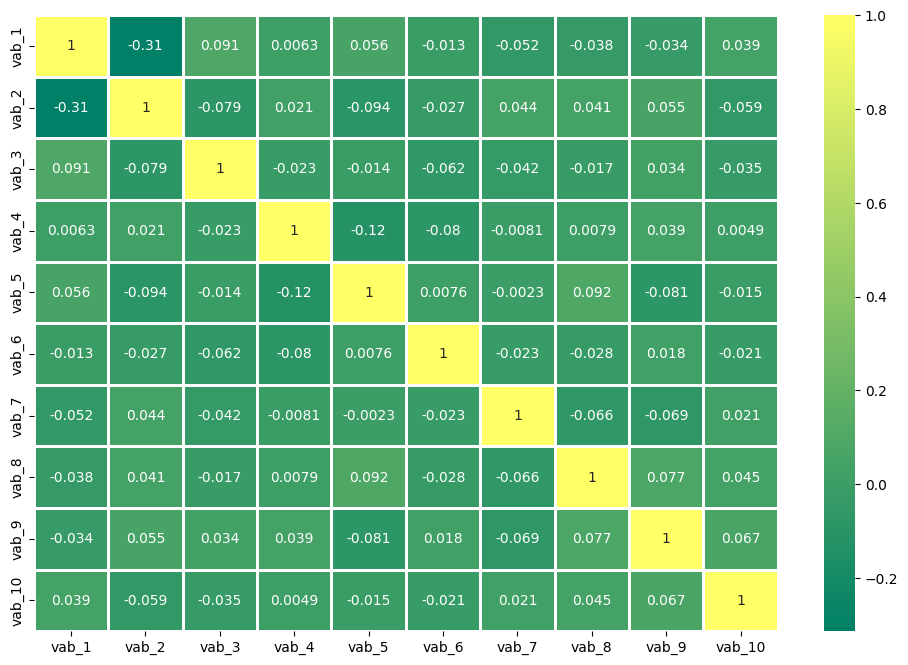

In [295]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [296]:
X_values = df_moons.iloc[:,:-1].values

In [297]:
y_values = df_moons.iloc[:,-1].values

In [298]:
from sklearn.preprocessing import StandardScaler

In [299]:
scaler = StandardScaler()

In [300]:
X_values = scaler.fit_transform(X_values)

In [301]:
np.mean(X_values),np.std(X_values)

(7.105427357601002e-18, 1.0)

In [302]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.304211 -0.673145 -0.032901  0.894961  0.249236  0.989218  1.009872   
1    0.868626  1.063112  1.472523  0.040790 -1.310561 -1.485159  0.202051   
2    0.706047 -1.063717 -0.432022  0.160515  1.398293  0.503617 -0.456517   
3   -0.456632  1.332519  0.003086  0.927095  0.833428  0.113081 -0.184914   
4    0.019725  2.167932 -1.486620 -0.742782  0.673277 -0.378587  0.150462   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.244811  1.232558 -0.732611  0.893950 -0.713849 -0.708162  0.744493   
496 -0.186495 -0.810391  1.372680 -1.956045 -0.092909 -1.339035 -0.462100   
497 -0.533311 -0.110667 -1.045187  0.646206  1.523749 -1.971458 -0.400798   
498  0.598422 -1.474277 -0.439921  0.258216 -0.266294 -0.014023 -0.081254   
499 -0.686113  2.322059 -0.973817  2.014584 -0.043367 -2.496337  1.238436   

            7         8         9  
0    0.627683 -1.091223  1.608041  
1   -0.726078 -1.765940 -1.488599  
2    0.405764  0.307969  0.727393  
3    0.970586 -0.729155 -1.419075  
4   -0.510054 -0.495588 -0.959281  
..        ...       ...       ...  
495 -0.142819 -0.113460  1.007722  
496  0.001154 -0.358719 -0.959101  
497  0.774096 -0.025851 -1.043588  
498 -0.540383  0.851301 -0.435629  
499  1.317746  0.480066  0.624272  

[500 rows x 10 columns]

## pca application

In [303]:
from sklearn.decomposition import PCA

In [304]:
pca_general = PCA()

In [305]:
pca_general.fit(X_values)

PCA()

In [306]:
explained_variance = pca_general.explained_variance_ratio_

In [307]:
explained_variance

array([0.14129563, 0.11912071, 0.11460419, 0.10576689, 0.10491675,
       0.09756538, 0.0874091 , 0.08245098, 0.078885  , 0.06798538])

In [308]:
eigenvalues = pca_general.explained_variance_

In [309]:
pd.DataFrame(eigenvalues)

0
0  1.415788
1  1.193594
2  1.148339
3  1.059788
4  1.051270
5  0.977609
6  0.875843
7  0.826162
8  0.790431
9  0.681216

In [310]:
eigenvectors = pca_general.components_

### scree plot

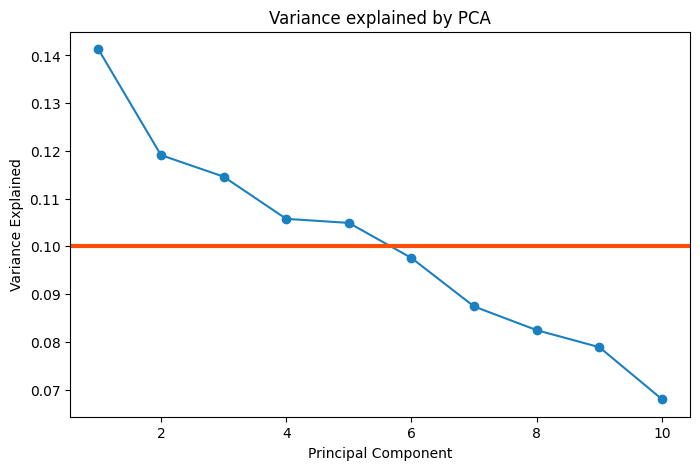

In [311]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [312]:
pca = PCA(n_components=2)

In [313]:
principal_components = pca.fit_transform(X_values)

In [314]:
pd.DataFrame(principal_components).head(8)

0         1
0 -0.692691 -0.203894
1 -0.040882 -0.105927
2 -1.408712  0.029170
3  1.066869 -0.610287
4  1.444502 -1.678393
5 -1.425366  0.233803
6 -0.818853  0.617500
7  1.236573  2.905866

In [315]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [316]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis = 1)

In [317]:
final_df

principal component 1  principal component 2  target
0                -0.692691              -0.203894       1
1                -0.040882              -0.105927       0
2                -1.408712               0.029170       1
3                 1.066869              -0.610287       0
4                 1.444502              -1.678393       0
..                     ...                    ...     ...
495               1.441443               0.516835       0
496              -1.008891              -0.424607       1
497               0.305749              -0.158187       1
498              -0.976170               0.560946       1
499               2.765068               1.339151       0

[500 rows x 3 columns]

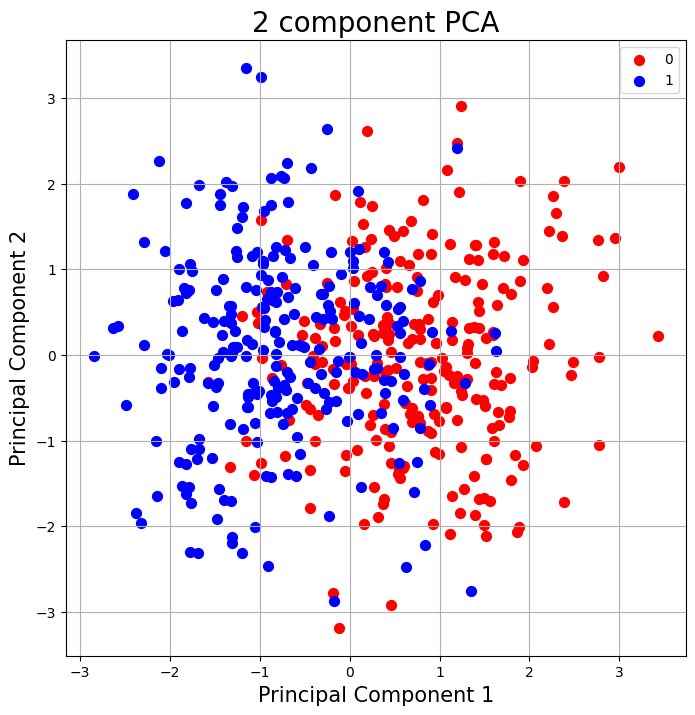

In [318]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

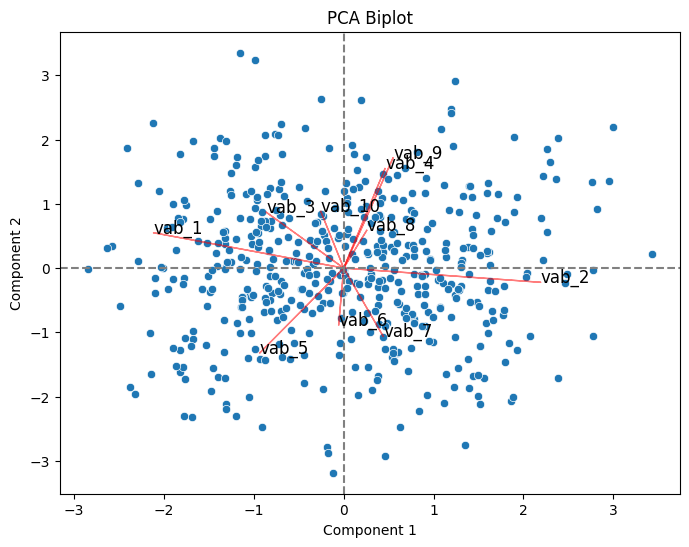

In [319]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

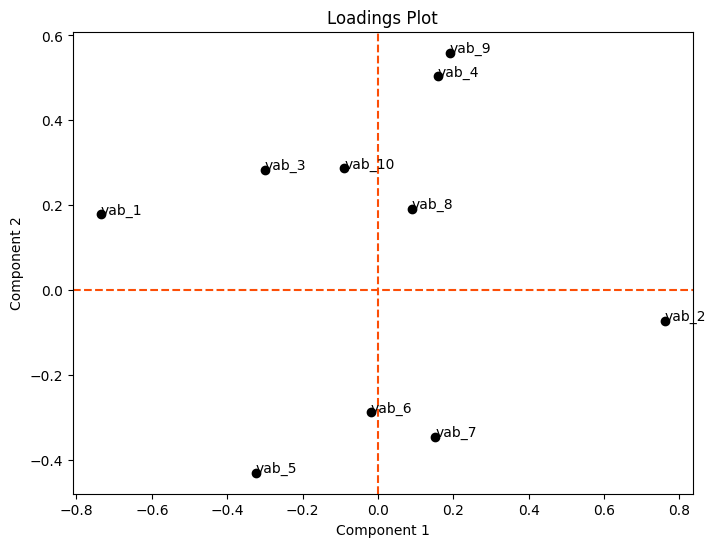

In [320]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [321]:
scores_pca = pca.transform(X_values)

In [322]:
pd.DataFrame(scores_pca).head()

0         1
0 -0.692691 -0.203894
1 -0.040882 -0.105927
2 -1.408712  0.029170
3  1.066869 -0.610287
4  1.444502 -1.678393

## t-SNE

In [323]:
tsne = TSNE(n_components=2)

In [324]:
X_tsne = tsne.fit_transform(X_values)

In [325]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [326]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [327]:
tsne_df

dim_1      dim_2  target
0    -4.492296  -3.544786     1.0
1   -12.314674 -10.950042     0.0
2    -2.069847   5.744147     1.0
3    -2.471422  -7.941847     0.0
4     1.334769 -15.139952     0.0
..         ...        ...     ...
495   5.808303  -9.872145     0.0
496   4.812725  12.915106     1.0
497  -1.901215 -16.116400     1.0
498  -3.664591   3.093886     1.0
499   3.550528 -16.586292     0.0

[500 rows x 3 columns]

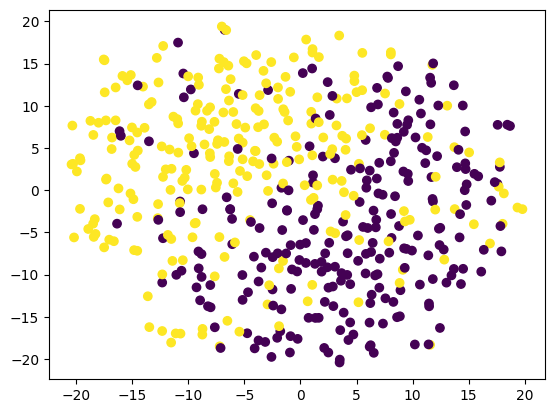

In [328]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [329]:
tsne.kl_divergence_

1.5742706060409546

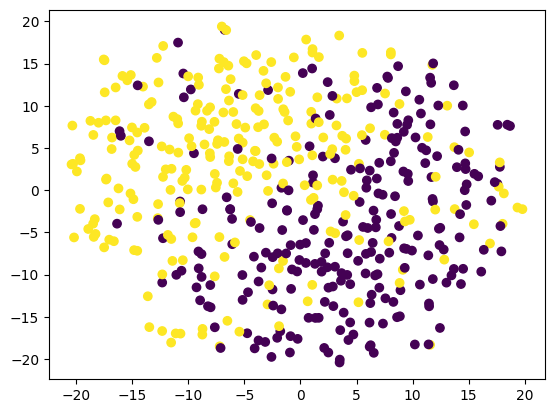

In [ ]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)
plt.show()

## clustering 

In [331]:
from sklearn.cluster import KMeans

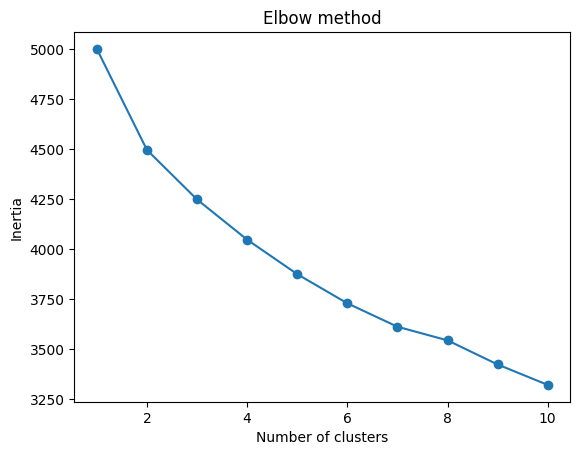

In [332]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [333]:
kmeans = KMeans(n_clusters=2)

In [334]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [335]:
df_moons['k_means'] = kmeans.labels_

In [336]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  
0    0.177611 -0.319198  0.498328       1        1  
1   -0.210525 -0.515157 -0.473810       0        1  
2    0.113985  0.087170  0.221864       1        1  
3    0.275925 -0.214042 -0.451984       0        0  
4   -0.148589 -0.146207 -0.307639       0        0  
..        ...       ...       ...     ...      ...  
495 -0.043299 -0.035226  0.309868       0        0  
496 -0.002021 -0.106456 -0.307583       1        1  
497  0.219589 -0.009781 -0.334106       1        0  
498 -0.157284  0.244971 -0.143247       1        1  
499  0.375459  0.137153  0.189491       0        0  

[500 rows x 12 columns]

In [337]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.812
accuracy after: 0.812


In [338]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  
0    0.177611 -0.319198  0.498328       1        1  
1   -0.210525 -0.515157 -0.473810       0        1  
2    0.113985  0.087170  0.221864       1        1  
3    0.275925 -0.214042 -0.451984       0        0  
4   -0.148589 -0.146207 -0.307639       0        0  
..        ...       ...       ...     ...      ...  
495 -0.043299 -0.035226  0.309868       0        0  
496 -0.002021 -0.106456 -0.307583       1        1  
497  0.219589 -0.009781 -0.334106       1        0  
498 -0.157284  0.244971 -0.143247       1        1  
499  0.375459  0.137153  0.189491       0        0  

[500 rows x 12 columns]

In [339]:
print(np.unique(df_moons['target']))

[0 1]


In [340]:
print(np.unique(kmeans.labels_))

[0 1]


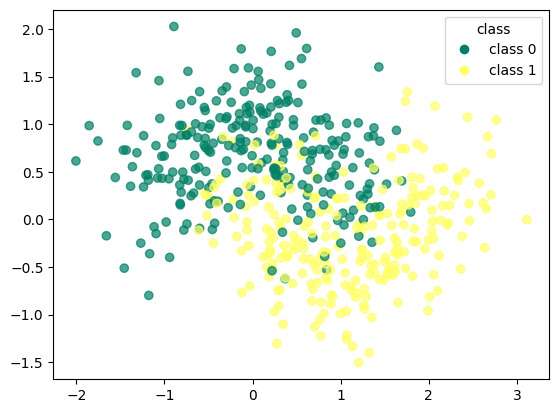

In [341]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

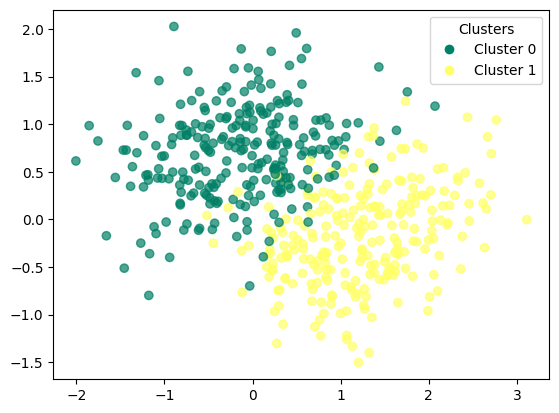

In [342]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [343]:
kmeans.cluster_centers_

array([[-0.70109987,  0.6588984 , -0.1926113 , -0.00995441, -0.08530812,
         0.02858346,  0.03442895,  0.14365985,  0.13665233, -0.03125719],
       [ 0.70109987, -0.6588984 ,  0.1926113 ,  0.00995441,  0.08530812,
        -0.02858346, -0.03442895, -0.14365985, -0.13665233,  0.03125719]])

In [344]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[203  47]
 [ 47 203]]


In [345]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       250
           1       0.81      0.81      0.81       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



### clustering with pca

In [346]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

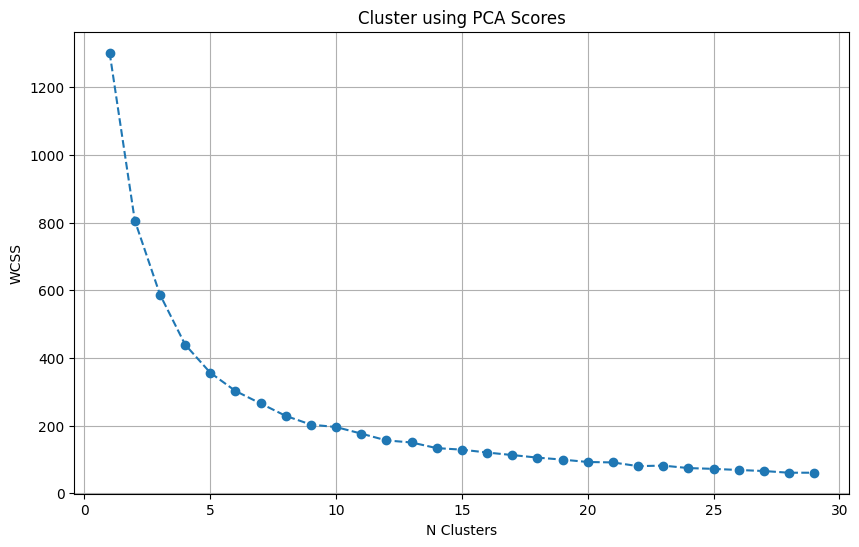

In [347]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [348]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [349]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [350]:
df_pca_kmeans = df_moons.copy()

In [351]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [352]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0    0.177611 -0.319198  0.498328       1        1           1  
1   -0.210525 -0.515157 -0.473810       0        1           0  
2    0.113985  0.087170  0.221864       1        1           1  
3    0.275925 -0.214042 -0.451984       0        0           0  
4   -0.148589 -0.146207 -0.307639       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495 -0.043299 -0.035226  0.309868       0        0           0  
496 -0.002021 -0.106456 -0.307583       1        1           1  
497  0.219589 -0.009781 -0.334106       1        0           0  
498 -0.157284  0.244971 -0.143247       1        1           1  
499  0.375459  0.137153  0.189491       0        0           0  

[500 rows x 13 columns]

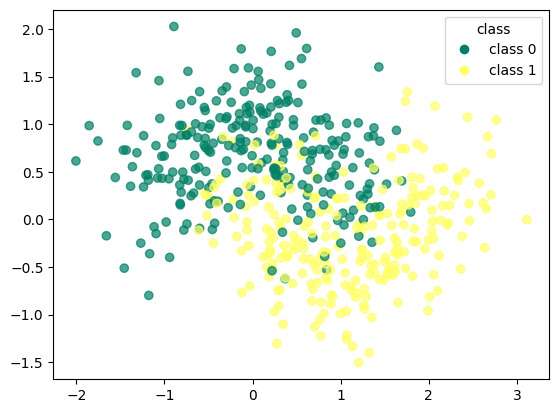

In [353]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

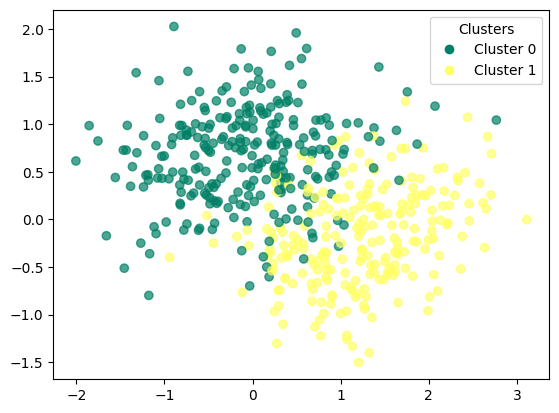

In [354]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [355]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.808
accuracy after: 0.808


In [356]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0    0.177611 -0.319198  0.498328       1        1           1  
1   -0.210525 -0.515157 -0.473810       0        1           0  
2    0.113985  0.087170  0.221864       1        1           1  
3    0.275925 -0.214042 -0.451984       0        0           0  
4   -0.148589 -0.146207 -0.307639       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495 -0.043299 -0.035226  0.309868       0        0           0  
496 -0.002021 -0.106456 -0.307583       1        1           1  
497  0.219589 -0.009781 -0.334106       1        0           0  
498 -0.157284  0.244971 -0.143247       1        1           1  
499  0.375459  0.137153  0.189491       0        0           0  

[500 rows x 13 columns]

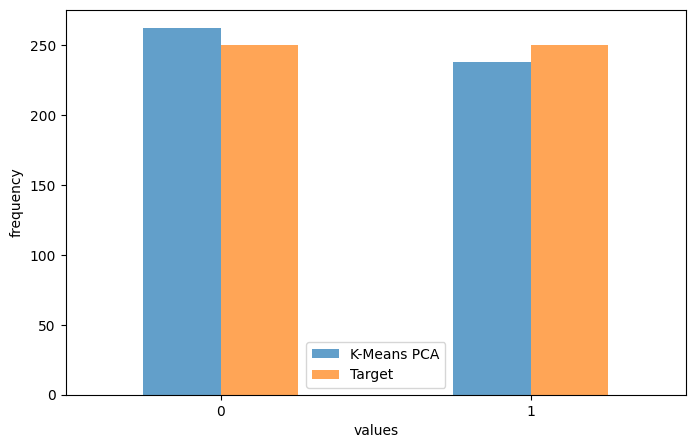

In [357]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [358]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[208  42]
 [ 54 196]]


In [359]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       250
           1       0.81      0.81      0.81       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [360]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       250
           1       0.82      0.78      0.80       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



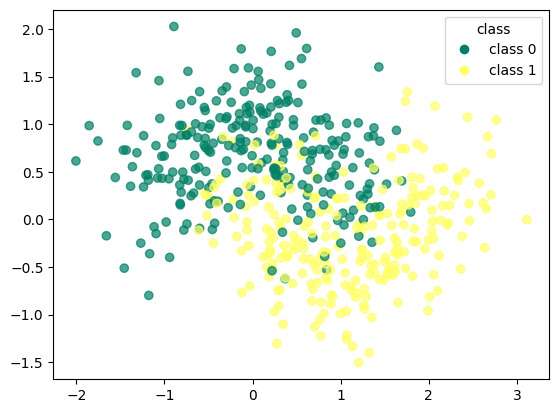

In [361]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

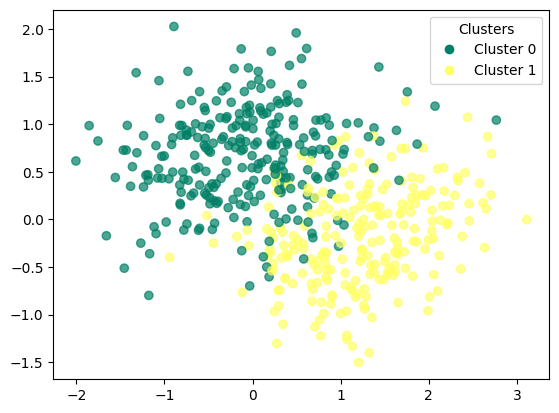

In [362]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

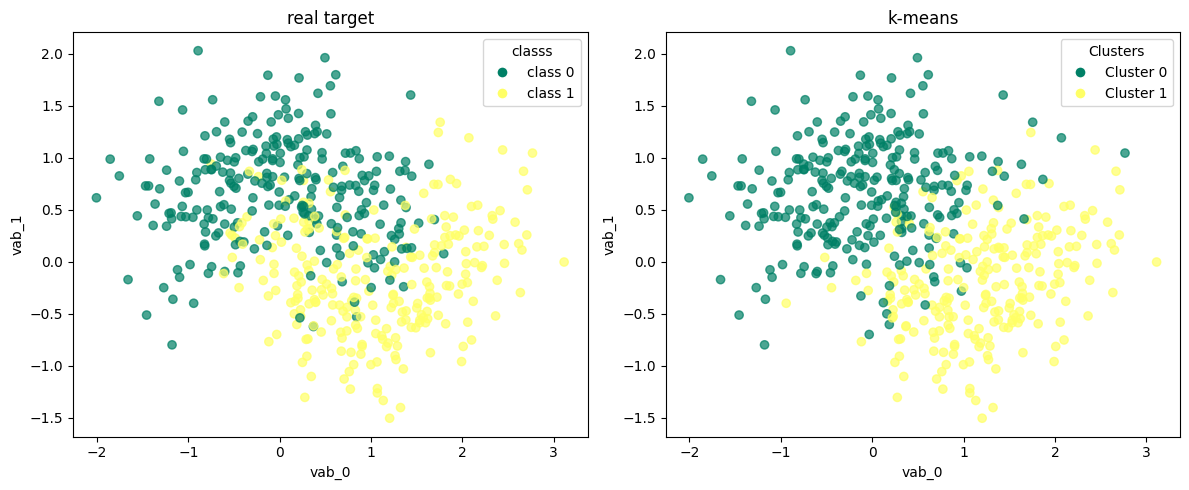

In [363]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

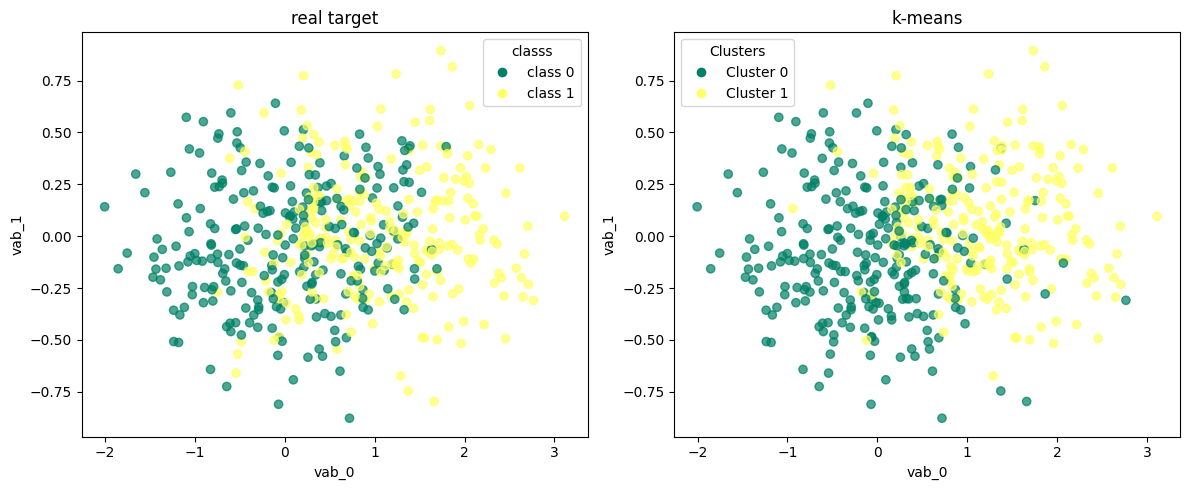

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

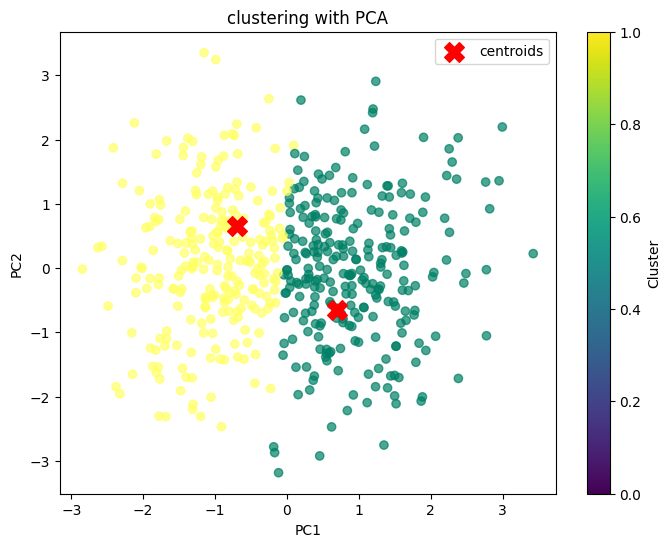

In [365]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

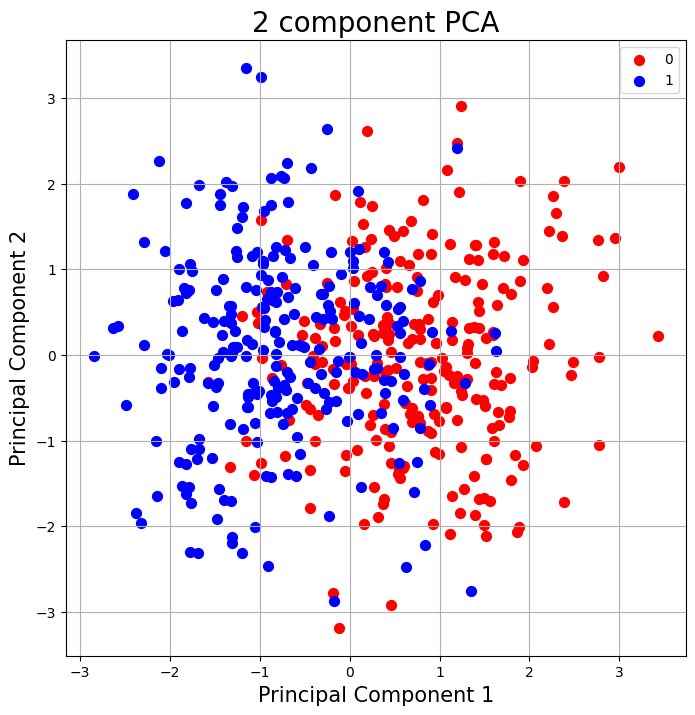

In [366]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [367]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [368]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [369]:
df_tsne_kmeans = df_moons.copy()

In [370]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [371]:
df_tsne_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  kmeans_tsne  
0    0.177611 -0.319198  0.498328       1        1            0  
1   -0.210525 -0.515157 -0.473810       0        1            0  
2    0.113985  0.087170  0.221864       1        1            1  
3    0.275925 -0.214042 -0.451984       0        0            0  
4   -0.148589 -0.146207 -0.307639       0        0            0  
..        ...       ...       ...     ...      ...          ...  
495 -0.043299 -0.035226  0.309868       0        0            0  
496 -0.002021 -0.106456 -0.307583       1        1            1  
497  0.219589 -0.009781 -0.334106       1        0            0  
498 -0.157284  0.244971 -0.143247       1        1            1  
499  0.375459  0.137153  0.189491       0        0            0  

[500 rows x 13 columns]

In [372]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.772
accuracy after: 0.772


In [373]:
df_tsne_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.022653  0.300280  0.066991  0.295045  0.310233   
1    1.378418  0.961775  0.423714  0.019062 -0.414531 -0.468149  0.076295   
2    1.220799 -0.440707 -0.140995  0.058479  0.421714  0.145266 -0.114421   
3    0.093588  1.139428 -0.011983  0.310859  0.247336  0.024810 -0.035767   
4    0.555413  1.690320 -0.453689 -0.238912  0.197896 -0.126840  0.061355   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.230121  0.299947 -0.230321 -0.228494  0.233381   
496  0.355484 -0.273658  0.394110 -0.638354 -0.038632 -0.423079 -0.116038   
497  0.019248  0.187757 -0.322802  0.218382  0.460443 -0.618143 -0.098286   
498  1.116456 -0.711441 -0.143337  0.090645 -0.092158 -0.014394 -0.005748   
499 -0.128893  1.791955 -0.301640  0.668892 -0.023338 -0.780036  0.376423   

        vab_8     vab_9    vab_10  target  k_means  kmeans_tsne  
0    0.177611 -0.319198  0.498328       1        1            0  
1   -0.210525 -0.515157 -0.473810       0        1            0  
2    0.113985  0.087170  0.221864       1        1            1  
3    0.275925 -0.214042 -0.451984       0        0            0  
4   -0.148589 -0.146207 -0.307639       0        0            0  
..        ...       ...       ...     ...      ...          ...  
495 -0.043299 -0.035226  0.309868       0        0            0  
496 -0.002021 -0.106456 -0.307583       1        1            1  
497  0.219589 -0.009781 -0.334106       1        0            0  
498 -0.157284  0.244971 -0.143247       1        1            1  
499  0.375459  0.137153  0.189491       0        0            0  

[500 rows x 13 columns]

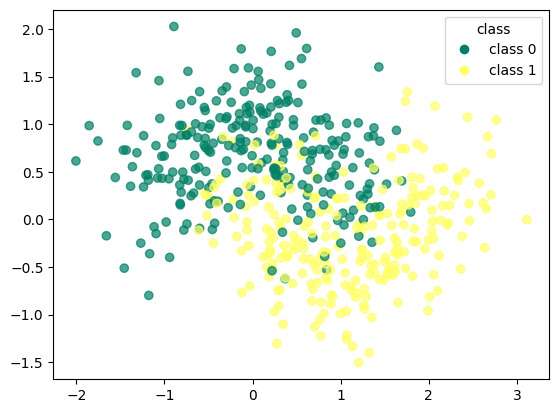

In [374]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

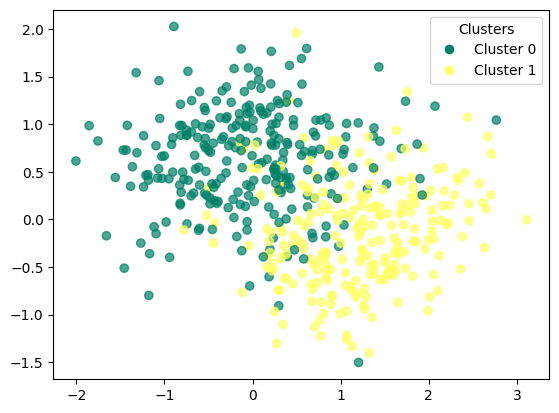

In [375]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

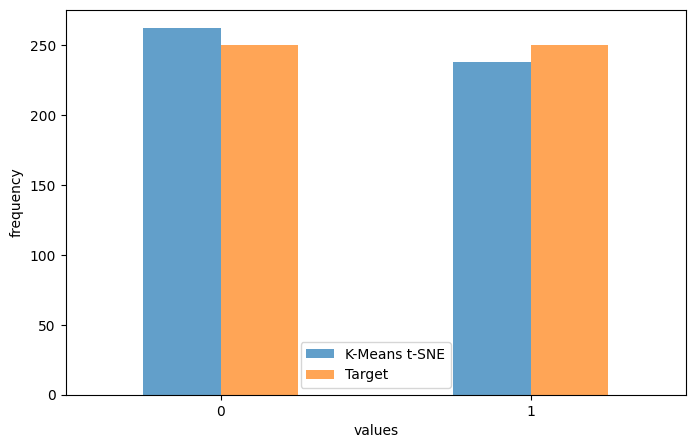

In [376]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [377]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[199  51]
 [ 63 187]]


In [378]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       250
           1       0.79      0.75      0.77       250

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



In [379]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       250
           1       0.82      0.78      0.80       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [380]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       250
           1       0.81      0.81      0.81       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



# non linear dataset - circles

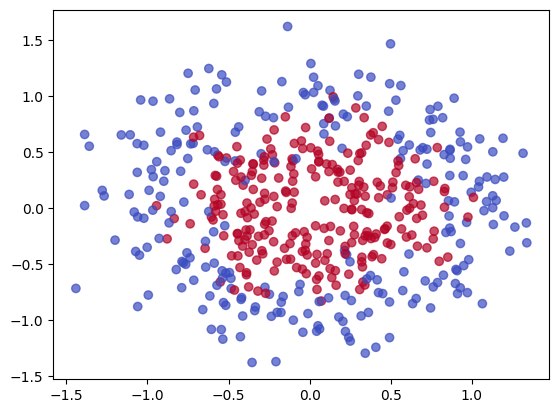

In [381]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [382]:
df3

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    -0.469004   0.323509   0.763108   0.383755   0.739257  -0.523310   
1     0.125867   1.048157   0.266990  -0.889101  -0.118426  -0.067099   
2    -0.386288   0.042201  -0.005278   0.468077   0.350298   0.061729   
3    -0.494481  -0.578267  -0.092305  -0.578856   0.255368  -0.508975   
4    -0.714102   0.865415  -0.762807   0.276062  -0.390202   0.058759   
..         ...        ...        ...        ...        ...        ...   
495  -0.854312   0.509894  -0.950537   0.041647   0.159128  -0.164283   
496   0.600061  -0.021119   0.708331   0.425468   0.268412   0.827317   
497  -0.715531   0.630037  -0.235270  -0.706346   0.062382  -0.601346   
498  -0.318829  -0.743461  -0.081704   0.090455  -0.019085   0.384058   
499  -1.042015   0.962384   0.113158   0.248173  -0.361150  -0.289326   

     Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0     0.158681   0.077623   0.175546    0.688116   -0.110395   -0.202752   
1    -0.460179   0.528530  -0.531120   -0.067937    0.146579    0.676726   
2    -0.544757  -0.717290   0.053253   -0.271348    0.459631    0.372928   
3    -0.379232  -0.489708  -0.069251    0.585096   -0.002520   -0.221609   
4    -0.177109   0.419089  -0.078618   -0.029463    0.242874    1.053470   
..         ...        ...        ...         ...         ...         ...   
495  -0.030443   0.095155   0.382300   -0.787440   -0.122159    0.754168   
496   0.958924  -0.064540  -0.484716   -0.135146    1.548348   -0.784678   
497  -0.054376  -0.975048   0.308810    0.611173   -0.191972   -0.067565   
498   0.616520  -0.407036  -0.154664    0.450810   -0.710835   -0.985361   
499  -0.380096  -0.433463   0.346748   -0.590249   -0.132761   -0.452668   

     Target  
0         1  
1         0  
2         1  
3         0  
4         0  
..      ...  
495       0  
496       1  
497       1  
498       1  
499       0  

[500 rows x 13 columns]